# Task 2. Algorithms for unconstrained nonlinear optimization. Direct methods

## Samarin Anton, C4113

### October 28, 2019

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import optimize
from functools import partial, wraps
from collections import namedtuple
import warnings

warnings.filterwarnings('ignore')

In [4]:
# for more beauty image
%matplotlib notebook

plt.rcParams['figure.figsize'] = [6, 5]

# Global Helpers

In [5]:
def printable(func):
    '''Decorator for printing information of computing'''
    
    @wraps(func)
    def wrapper(*args, output=False):
        result, iters, calls = func(*args)
        print(f'Minimum argument obtained from {func.__name__}:', result)
        print(f'Number of iterations in {func.__name__}:', iters)
        print(f'Number of calls in {func.__name__}:', calls)
        
        return result if output else None

    return wrapper

# Task 1

## Helpers

In [6]:
def show_graph(func, a, b, title, delta=0.01):
    '''Show graph and minimum'''
    domain = np.arange(a, b + delta, delta)
    func_range = func(domain)
    min_index = np.argmin(func_range)
    
    plt.plot(domain, func_range)
    plt.scatter(domain[min_index], func_range[min_index],
                s=60, alpha=0.8, edgecolors='black', color='red', label='min')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(title)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

## Task data

In [7]:
EPS = 0.001

In [8]:
def cube(x):
    return x ** 3

<IPython.core.display.Javascript object>


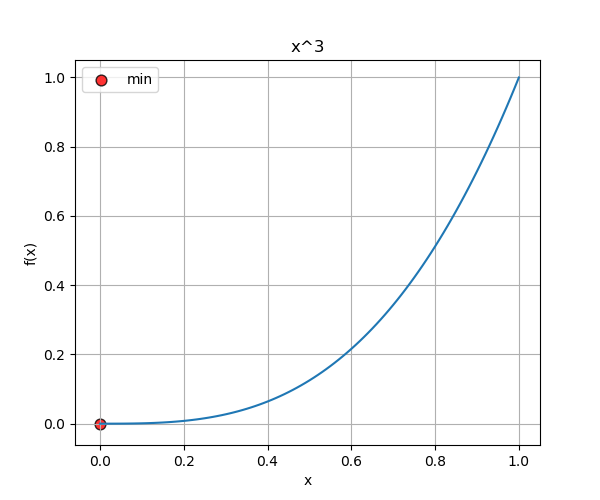

In [9]:
show_graph(cube, 0, 1, 'x^3')

In [10]:
def module(x):
    return abs(x - 0.2)

<IPython.core.display.Javascript object>


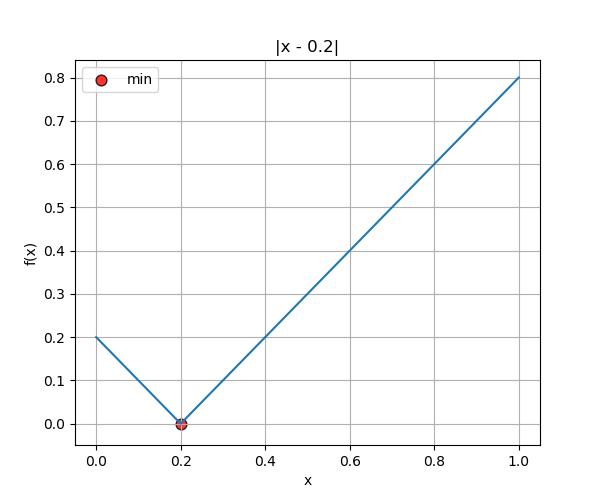

In [11]:
show_graph(module, 0, 1, '|x - 0.2|')

In [12]:
def bad_sin(x):
    return x * np.sin(1 / x)

<IPython.core.display.Javascript object>


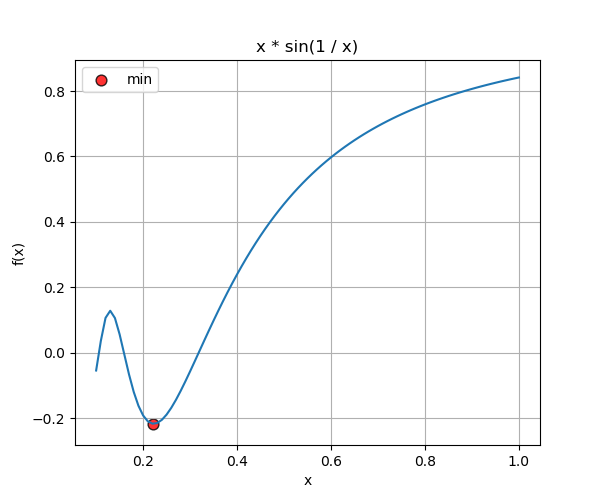

In [13]:
show_graph(bad_sin, 0.1, 1, 'x * sin(1 / x)')

## One-dimensional direct methods

In [14]:
def exhaustive_search(func, a, b):
    x_min = a
    f_min = np.inf
    iters = 0
    
    for x in np.arange(a, b + EPS, EPS):
        current = func(x)
        iters += 1  # Number of iterations equal number of call function
        if current < f_min:
            f_min = current
            x_min = x
    
    return x_min, iters, iters

In [15]:
def dichotomy(func, a, b):
    delta = EPS / 2
    iters = 0
    
    while abs(b - a) >= EPS:
        iters += 1  # Number of calls is twice number of iterations
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        if func(x1) < func(x2):
            b = x2
        else:
            a = x1
    
    return (b + a) / 2, iters, 2 * iters

In [16]:
def golden_section(func, a, b):
    gold = (3 - math.sqrt(5)) / 2
    
    x1 = gold * (b - a) + a
    x2 = gold * (a - b) + b
    
    f1 = func(x1)
    f2 = func(x2)
    
    iters = 0
    
    while abs(b - a) >= EPS:
        iters += 1  # Number of calls is two more than number of iterations
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = gold * (b - a) + a
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = gold * (a - b) + b
            f2 = func(x2)
    
    return (b + a) / 2, iters, iters + 2

## Calculations

In [17]:
pretty_exhaustive_search = printable(exhaustive_search)
pretty_dichotomy = printable(dichotomy)
pretty_golden_section = printable(golden_section)

### x^3

In [18]:
pretty_exhaustive_search(cube, 0, 1)

Minimum argument obtained from exhaustive_search: 0.0
Number of iterations in exhaustive_search: 1001
Number of calls in exhaustive_search: 1001


In [19]:
pretty_dichotomy(cube, 0, 1)

Minimum argument obtained from dichotomy: 0.0004940185546875001
Number of iterations in dichotomy: 11
Number of calls in dichotomy: 22


In [20]:
pretty_golden_section(cube, 0, 1)

Minimum argument obtained from golden_section: 0.000366568717928702
Number of iterations in golden_section: 15
Number of calls in golden_section: 17


### |x - 0.2|

In [21]:
pretty_exhaustive_search(module, 0, 1)

Minimum argument obtained from exhaustive_search: 0.2
Number of iterations in exhaustive_search: 1001
Number of calls in exhaustive_search: 1001


In [22]:
pretty_dichotomy(module, 0, 1)

Minimum argument obtained from dichotomy: 0.20010119628906245
Number of iterations in dichotomy: 11
Number of calls in dichotomy: 22


In [23]:
pretty_golden_section(module, 0, 1)

Minimum argument obtained from golden_section: 0.2000733137435857
Number of iterations in golden_section: 15
Number of calls in golden_section: 17


### x * sin(1 / x)

In [24]:
pretty_exhaustive_search(bad_sin, 0.1, 1)

Minimum argument obtained from exhaustive_search: 0.22300000000000011
Number of iterations in exhaustive_search: 901
Number of calls in exhaustive_search: 901


In [25]:
pretty_dichotomy(bad_sin, 0.1, 1)

Minimum argument obtained from dichotomy: 0.22256970214843746
Number of iterations in dichotomy: 11
Number of calls in dichotomy: 22


In [26]:
pretty_golden_section(bad_sin, 0.1, 1)

Minimum argument obtained from golden_section: 0.22259314448826506
Number of iterations in golden_section: 15
Number of calls in golden_section: 17


## Conclusion

Exhaustive search has a worse result than other algorithms, because it must compute target function at every iteration. Number of iterations depend from epsilon and length of domain as like ${length \over epsilon}$

Dichotomy method and Golden section method have the same idea. There is different in selection of segment.

We must compute target function is twice at every iteration in dichotomy method. Number of iterations depend from epsilon, delta and length of domain. Domain reduce about at two time if we choose a pretty small delta.

We must compute target function at every iteration and two time yet for beginning condition in Golden section method. Number of iterations depend from epsilon and length of domain. Domain reduce at ${\sqrt{5} - 1 \over 2}$ time at every iteration.

Number of calls a target function is fewer in Golden section method than Dichotomy method, but Dichotomy method has fewer iterations than Golden section method if we choose a pretty small delta.

# Task 2

## Helpers

In [27]:
def plot_functional(func, title):
    '''Show functional'''
    a_possible = np.arange(-0.5, 2, 0.01)
    b_possible = np.arange(-0.5, 2, 0.01)
    A, B = np.meshgrid(a_possible, b_possible)
    Z = np.zeros((len(b_possible), len(a_possible)))
    for i in range(len(b_possible)):
        for j in range(len(a_possible)):
            Z[i][j] = error(func, a_possible[j], b_possible[i])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(A, B, Z, cmap=cm.coolwarm)
    ax.set_title(title, {'fontsize': 25}, pad=25)
    ax.set_xlabel('a', {'fontsize': 15})
    ax.set_ylabel('b', {'fontsize': 15})
    ax.set_zlabel('Error', {'fontsize': 15})
    fig.show()

In [28]:
def plot_regression(brute, gauss, nelder_mead, title):
    '''Show generated data and regression'''
    args = np.array([0, 1])
    plt.scatter(x, y, s=30, color='blue', alpha = 0.3)
    plt.plot(args, brute.a * args + brute.b, color='red', label='Exhaustive search')
    plt.plot(args, gauss.a * args + gauss.b, color='green', label='Gauss method')
    plt.plot(args, nelder_mead.a * args + nelder_mead.b, color='magenta', label='Nelder-Mead method')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title, {'fontsize': 20}, pad=20)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [29]:
def middleware(params, func):
    '''Format data as list'''
    return error(func, params[0], params[1])

In [30]:
Point = namedtuple('Point', ['a', 'b'])

## Task data

In [31]:
EPS = 0.001

a = 0.5777108169215578
b = 0.694969180952264


<IPython.core.display.Javascript object>


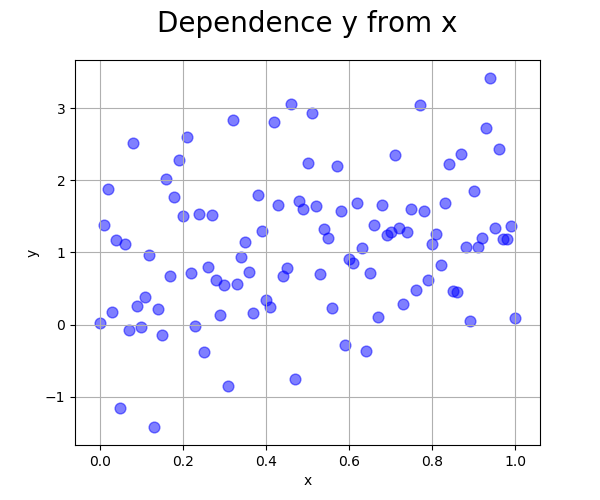

In [82]:
# generate the noisy data
a, b = np.random.uniform(0, 1, 2)
k = 100
print(f'a = {a}', f'b = {b}', sep='\n')
x = np.arange(0, 1 + 1 / k, 1 / k)
d = np.random.normal(0, 1, k + 1)
y = a * x + b + d

# show generated data
plt.scatter(x, y, s=60, color='blue', alpha = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dependence y from x', {'fontsize': 20}, pad=20)
plt.grid()
plt.show()

In [83]:
def error(func, a, b):
    '''Function of error'''
    return np.sum((func(a, b) - y) ** 2)

In [84]:
def linear(a, b):
    '''Linear regression'''
    return a * x + b

In [85]:
def rational(a, b):
    '''Rational regression'''
    return a / (1 + b * x)

<IPython.core.display.Javascript object>


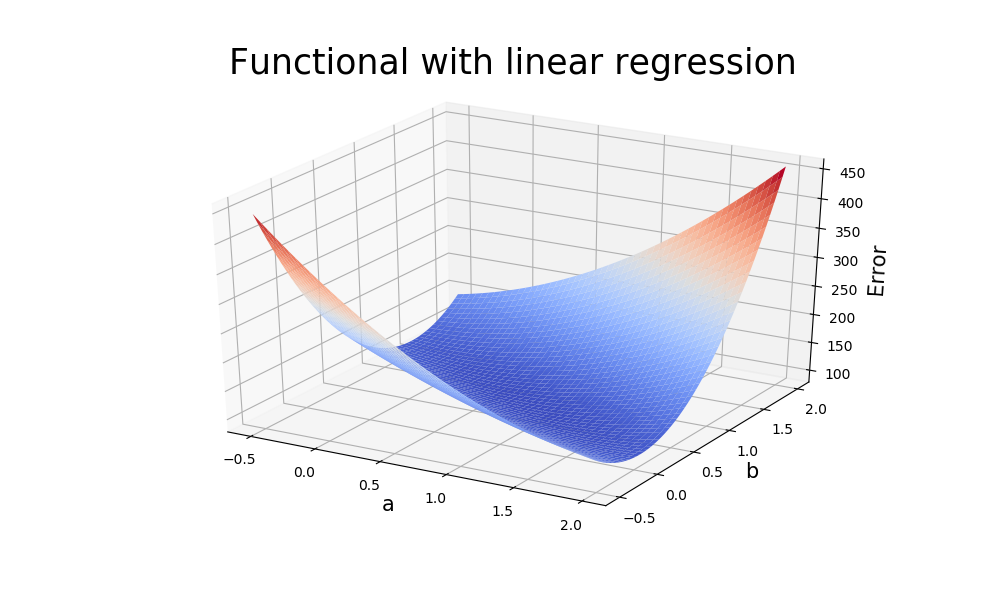

In [86]:
plot_functional(linear, 'Functional with linear regression')

<IPython.core.display.Javascript object>


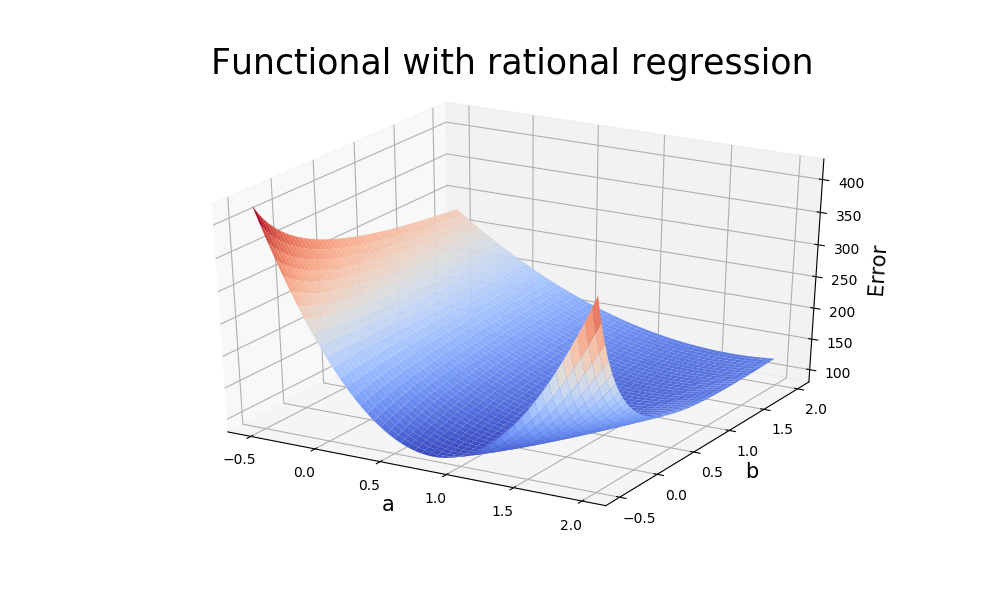

In [87]:
plot_functional(rational, 'Functional with rational regression')

## Multidimensional direct methods

In [88]:
def brute_search(func):
    error_func = partial(middleware, func=func)
    rranges = (slice(-0.5, 1.5, EPS), slice(-0.5, 1.5, EPS))
    a_best, b_best = optimize.brute(error_func, rranges, finish=None, workers=-1)
    return (a_best, b_best), math.ceil(2 / EPS), math.ceil(2 / EPS)

In [89]:
def gauss_method(func):
    optimize_func = partial(golden_section, a=-0.5, b=1.5)
    error_func = partial(error, func)
    a_best, b_best = np.random.uniform(-0.5, 1.5, 2)
    current_vector = np.array([np.inf, np.inf])
    next_vector = np.array([a_best, b_best])
    
    iters = 0
    calls = 0
    
    while np.linalg.norm(next_vector - current_vector) >= EPS:
        current_vector = next_vector
        
        b_const_func = partial(error_func, b=b_best)
        a_best, _, b_const_calls = optimize_func(b_const_func)

        a_const_func = partial(error_func, a_best)
        b_best, _, a_const_calls = optimize_func(a_const_func)
    
        next_vector = np.array([a_best, b_best])
        
        iters += 1
        calls = calls + a_const_calls + b_const_calls
        
    return (a_best, b_best), iters, calls

In [90]:
def nelder_mead_method(func):
    error_func = partial(middleware, func=func)
    suppose_min = np.random.uniform(-0.5, 1.5, 2)
    result = optimize.minimize(error_func, method='Nelder-Mead', x0=suppose_min, options={'xatol': EPS})
    return result.x, result.nit, result.nfev

## Calculations

In [91]:
pretty_brute_search = printable(brute_search)
pretty_gauss_method = printable(gauss_method)
pretty_nelder_mead_method = printable(nelder_mead_method)

### Functional with linear regression

In [92]:
result = pretty_brute_search(linear, output=True)
brute = Point(*result)

Minimum argument obtained from brute_search: (0.837, 0.6759999999999999)
Number of iterations in brute_search: 2000
Number of calls in brute_search: 2000


In [98]:
result = pretty_gauss_method(linear, output=True)
gauss = Point(*result)

Minimum argument obtained from gauss_method: (0.8355547812946895, 0.6767811636300218)
Number of iterations in gauss_method: 20
Number of calls in gauss_method: 720


In [105]:
result = pretty_nelder_mead_method(linear, output=True)
nelder_mead = Point(*result)

Minimum argument obtained from nelder_mead_method: [0.83713458 0.67588724]
Number of iterations in nelder_mead_method: 38
Number of calls in nelder_mead_method: 73


<IPython.core.display.Javascript object>


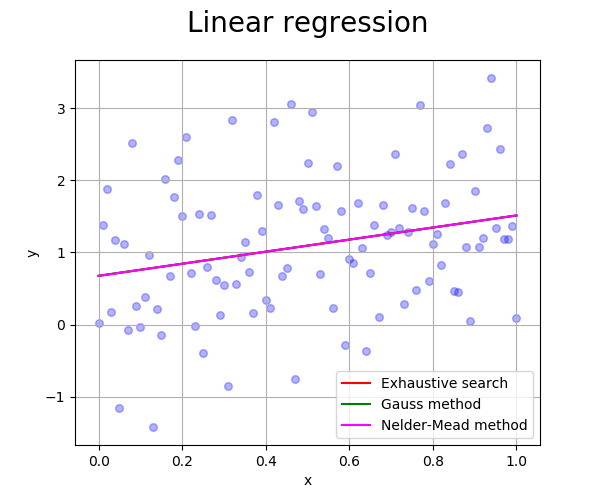

In [107]:
plot_regression(brute, gauss, nelder_mead, 'Linear regression')

<IPython.core.display.Javascript object>


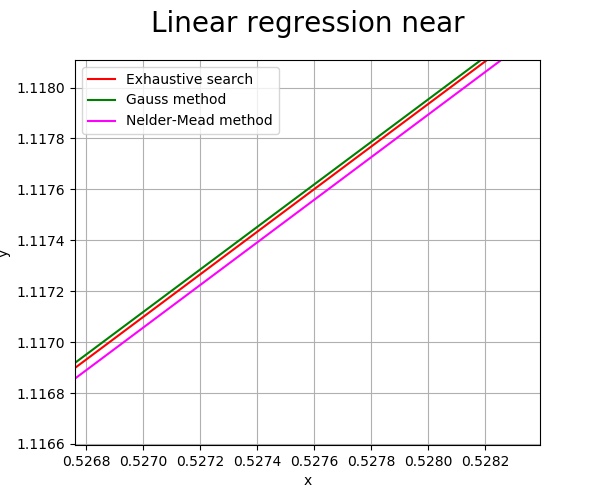

In [108]:
plot_regression(brute, gauss, nelder_mead, 'Linear regression near')

### Functional with rational regression

In [138]:
result = pretty_brute_search(rational, output=True)
brute = Point(*result)

Minimum argument obtained from brute_search: (0.794, -0.495)
Number of iterations in brute_search: 2000
Number of calls in brute_search: 2000


In [147]:
result = pretty_gauss_method(rational, output=True)
gauss = Point(*result)

Minimum argument obtained from gauss_method: (0.7959148585337028, -0.49368179665935596)
Number of iterations in gauss_method: 19
Number of calls in gauss_method: 684


In [140]:
result = pretty_nelder_mead_method(rational, output=True)
nelder_mead = Point(*result)

Minimum argument obtained from nelder_mead_method: [ 0.79397802 -0.49524905]
Number of iterations in nelder_mead_method: 36
Number of calls in nelder_mead_method: 71


<IPython.core.display.Javascript object>


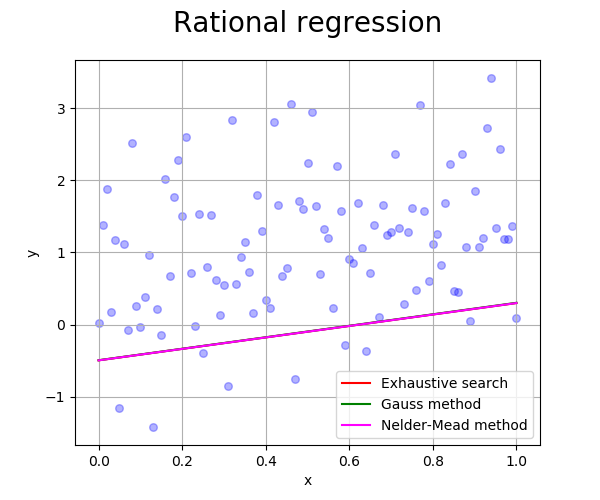

In [149]:
plot_regression(brute, gauss, nelder_mead, 'Rational regression')

<IPython.core.display.Javascript object>


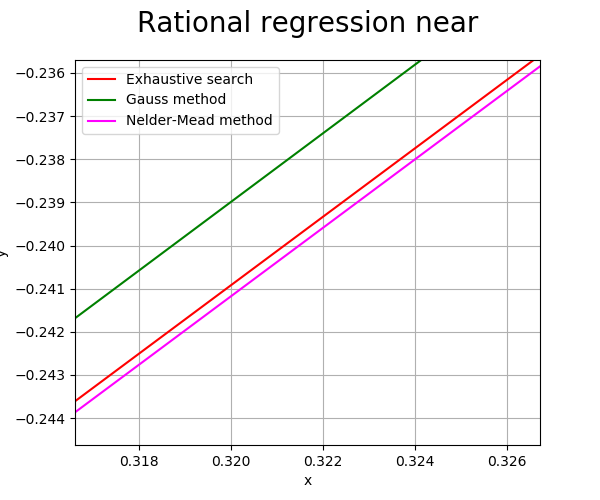

In [151]:
plot_regression(brute, gauss, nelder_mead, 'Rational regression near')

## Conclusion

As can be seen from the graphs, the coefficient values are approximately equal. But resources are different, that are needed for computing.

Exhaustive search is greedy. It has 2000 iterations and 2000 calls of target function. Target function is called at every iteration. Number of iterations depend from size of domain and epsilon as like ${length_1 \over epsilon} * {length_2 \over epsilon}$. It is similar at one-dimension algorithm. It is worse by resources consumption than other algorithms.

Gauss method has fewer iterations than other algorithms. Also it is variable, because we can choose a different one-dimension algorithms of optimization. Although we choose golden section method, number of call a target function are leaving much to be desired.


Nelder-Mead method has a better results by resources consumption than algorithms are described above.